# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Reading dataset

In [2]:
df=pd.read_csv(r"C:\Users\DELL LAPTOP\Desktop\3-1\ML\adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Checking for null values

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Preprocessing

In [4]:
df['occupation'].replace({'?' : 'Unknown'}, inplace=True)
df['workclass'].replace({'?' : 'Unknown'}, inplace=True)

df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


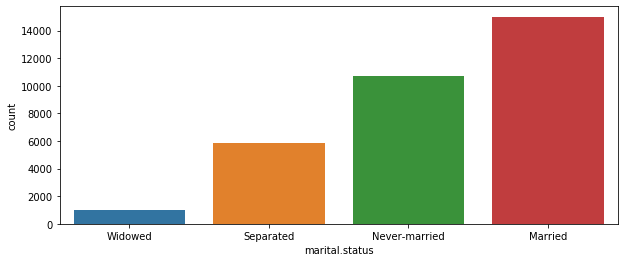

In [5]:
df['marital.status'].replace({'Married-civ-spouse' : 'Married' ,
                                            'Divorced' : 'Separated', 
                                            'Married-AF-spouse' : 'Married' , 
                                            'Married-spouse-absent':'Separated'}, inplace = True)
plt.figure(figsize=(10,4))
sns.countplot(df['marital.status'])

Text(0.5, 0, 'Education')

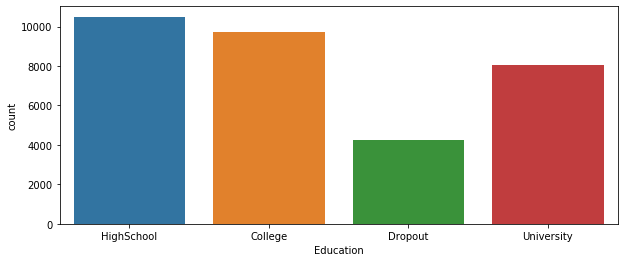

In [6]:
df['education'].replace({'HS-grad':'HighSchool', 
                                       'Some-college':'College', 
                                       'Bachelors' : 'University', 
                                       'Masters' : 'University',
                                       'Assoc-voc' : 'College', 
                                       'Assoc-acdm':'College',
                                       'Prof-school' : 'University', 
                                       'Doctorate' : 'University', 
                                       '11th' : 'Dropout',
                                       '10th' : 'Dropout',
                                       '7th-8th' : 'Dropout',
                                       '9th' : 'Dropout', 
                                       '12th' : 'Dropout',
                                       '5th-6th': 'Dropout',
                                       '1st-4th': 'Dropout',
                                       'Preschool':'Dropout'}, inplace = True)

plt.figure(figsize=(10,4))
sns.countplot(df['education'])
plt.xlabel('Education')

###  average working hours per week for each gender in different occupations

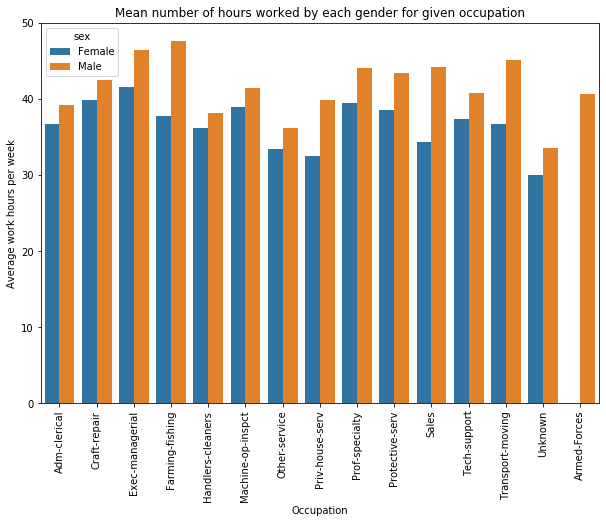

In [7]:
avg_hours_occ = df.groupby(['sex','occupation'])['hours.per.week'].mean().reset_index()
plt.figure(figsize=(10, 7))
sns.barplot(x='occupation', y='hours.per.week', hue='sex', data=avg_hours_occ)
plt.xlabel('Occupation')
plt.ylabel('Average work hours per week')
plt.title('Mean number of hours worked by each gender for given occupation')
_ = plt.xticks(rotation=90)

### average working hours per week based on education

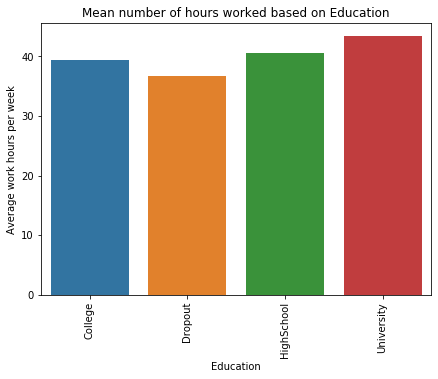

In [8]:
avg_hours_edu = df.groupby(['education'])['hours.per.week'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='education', y='hours.per.week', data=avg_hours_edu)
plt.xlabel('Education')
plt.ylabel('Average work hours per week')
plt.title('Mean number of hours worked based on Education')
_ = plt.xticks(rotation=90)

### relationship between age and average hours 

Text(0.5, 1.0, 'Mean number of hours worked based on Age')

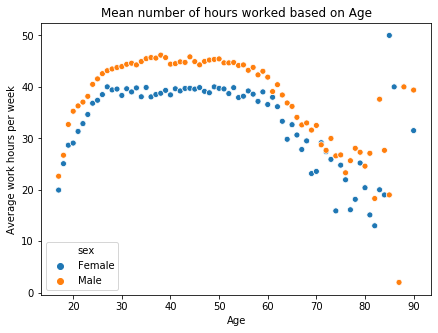

In [9]:
avg_hours_age = df.groupby(['sex','age'])['hours.per.week'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.scatterplot(x='age', y='hours.per.week', hue='sex', data=avg_hours_age)
plt.xlabel('Age')
plt.ylabel('Average work hours per week')
plt.title('Mean number of hours worked based on Age')


###  Mean number of hours worked based on Age

Text(0.5, 1.0, 'Mean number of hours worked based on Age')

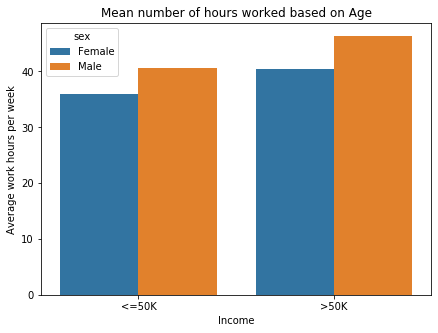

In [10]:
avg_hours_income =df.groupby(['sex','income'])['hours.per.week'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='income', y='hours.per.week', hue='sex', data=avg_hours_income)
plt.xlabel('Income')
plt.ylabel('Average work hours per week')
plt.title('Mean number of hours worked based on Age')

### Number of male and female workers with income > 50K based on Occupation 

Text(0.5, 1.0, 'Number of male and female workers with income > 50K based on Occupation')

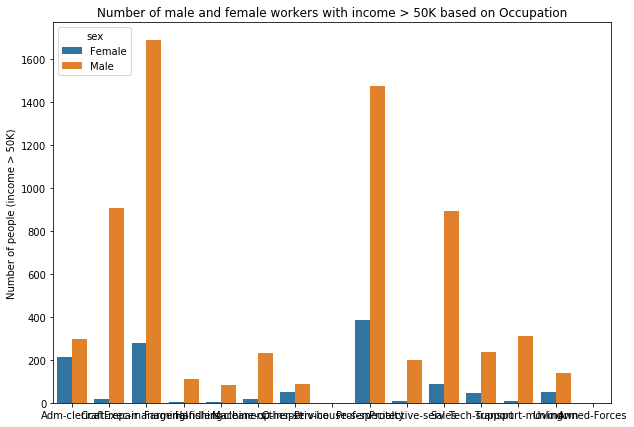

In [11]:
income_df = df[['sex', 'occupation', 'income']].copy()
income_df['income_grt50K'] = income_df['income'].apply(lambda x: 1 if x == '>50K' else 0)
income_grt50K = income_df.groupby(['sex','occupation'])['income_grt50K'].sum().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='occupation', y='income_grt50K', hue='sex', data=income_grt50K)
plt.xlabel('')
plt.ylabel('Number of people (income > 50K)')
plt.title('Number of male and female workers with income > 50K based on Occupation')

### Number of male and female workers with income > 50K based on Working class 

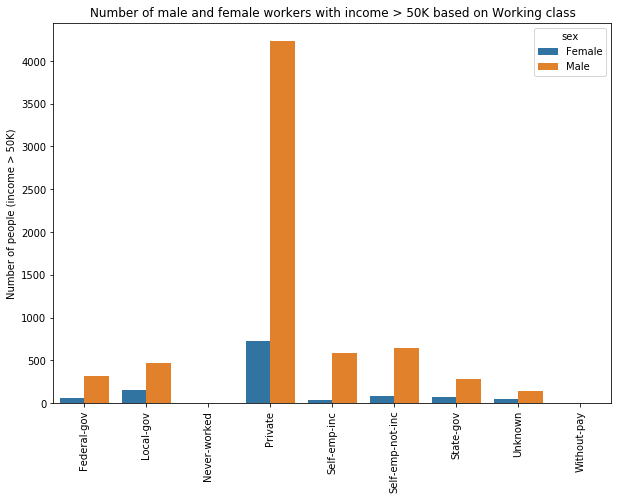

In [12]:
income_df = df[['sex', 'workclass', 'income']].copy()
income_df['income_grt50K'] = income_df['income'].apply(lambda x: 1 if x == '>50K' else 0)
income_grt50K = income_df.groupby(['sex','workclass'])['income_grt50K'].sum().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='workclass', y='income_grt50K', hue='sex', data=income_grt50K)
plt.xlabel('')
plt.ylabel('Number of people (income > 50K)')
plt.title('Number of male and female workers with income > 50K based on Working class')
_ = plt.xticks(rotation=90)

### Number of male and female workers with income > 50K based on Age 

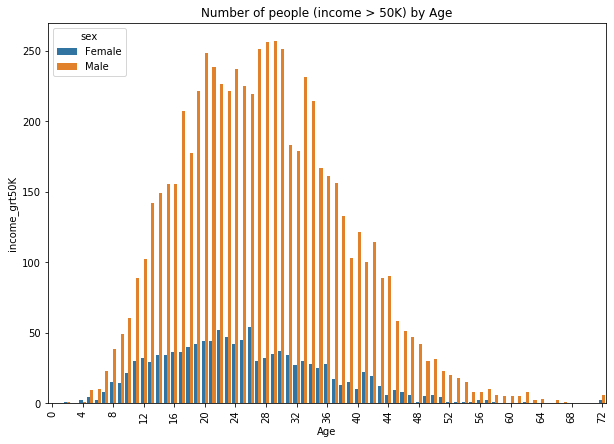

In [13]:
import matplotlib.ticker as ticker
income_df = df[['sex', 'age', 'income']].copy()
income_df['income_grt50K'] = income_df['income'].apply(lambda x: 1 if x == '>50K' else 0)
income_grt50K = income_df.groupby(['sex','age'])['income_grt50K'].sum().reset_index()
income_grt50K

plt.figure(figsize=(10, 7))
ax = sns.barplot(x='age', y='income_grt50K', hue='sex', data=income_grt50K)
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xlabel('Age')
plt.title('Number of people (income > 50K) by Age')
_ = plt.xticks(rotation=90)

### Number of male and female workers with income > 50K based on Education 

Text(0.5, 1.0, 'Number of male and female workers with income > 50K based on Education')

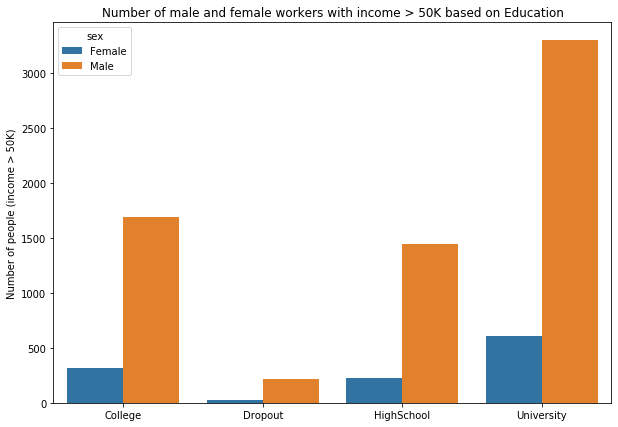

In [14]:
income_df = df[['sex', 'education', 'income']].copy()
income_df['income_grt50K'] = income_df['income'].apply(lambda x: 1 if x == '>50K' else 0)
income_grt50K = income_df.groupby(['sex','education'])['income_grt50K'].sum().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='education', y='income_grt50K', hue='sex', data=income_grt50K)
plt.xlabel('')
plt.ylabel('Number of people (income > 50K)')
plt.title('Number of male and female workers with income > 50K based on Education')


### Number of male and female workers with income <= 50K based on Education 

Text(0.5, 1.0, 'Number of male and female workers with income <= 50K based on Education')

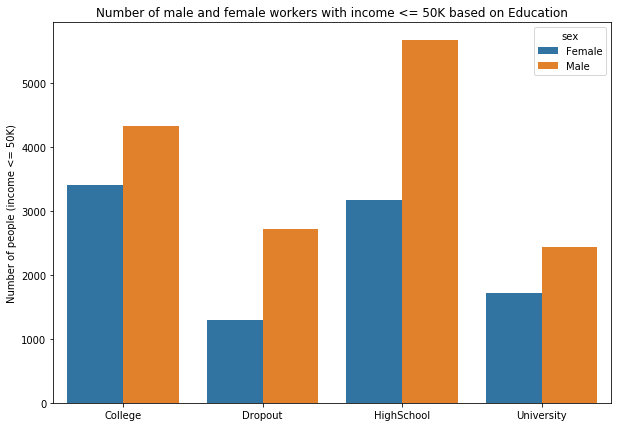

In [15]:
income_df = df[['sex', 'education', 'income']].copy()
income_df['income_leq50K'] = income_df['income'].apply(lambda x: 1 if x == '<=50K' else 0)
income_leq50K = income_df.groupby(['sex','education'])['income_leq50K'].sum().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='education', y='income_leq50K', hue='sex', data=income_leq50K)
plt.xlabel('')
plt.ylabel('Number of people (income <= 50K)')
plt.title('Number of male and female workers with income <= 50K based on Education')

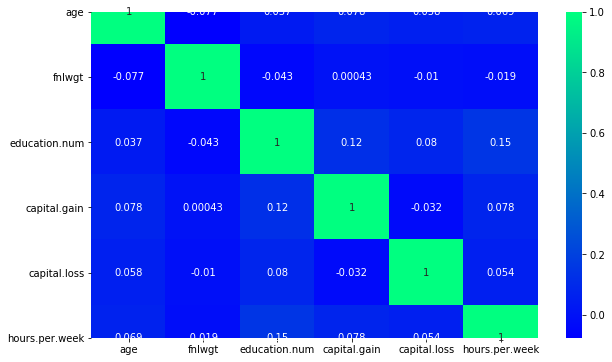

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True , cmap='winter')

In [17]:
df = df.drop(columns=['native.country', 'marital.status', 'education'])
df.head()

,age,workclass,fnlwgt,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,Unknown,77053,9,Unknown,Not-in-family,White,Female,0,4356,40,<=50K
1,82,Private,132870,9,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
2,66,Unknown,186061,10,Unknown,Unmarried,Black,Female,0,4356,40,<=50K
3,54,Private,140359,4,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,264663,10,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K


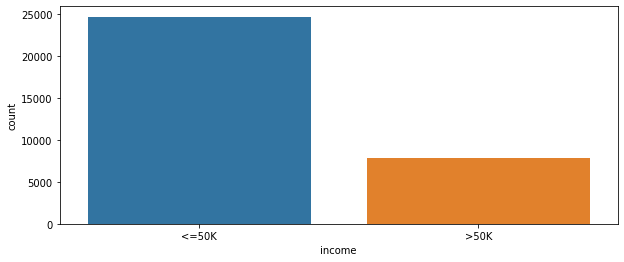

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(df['income'])

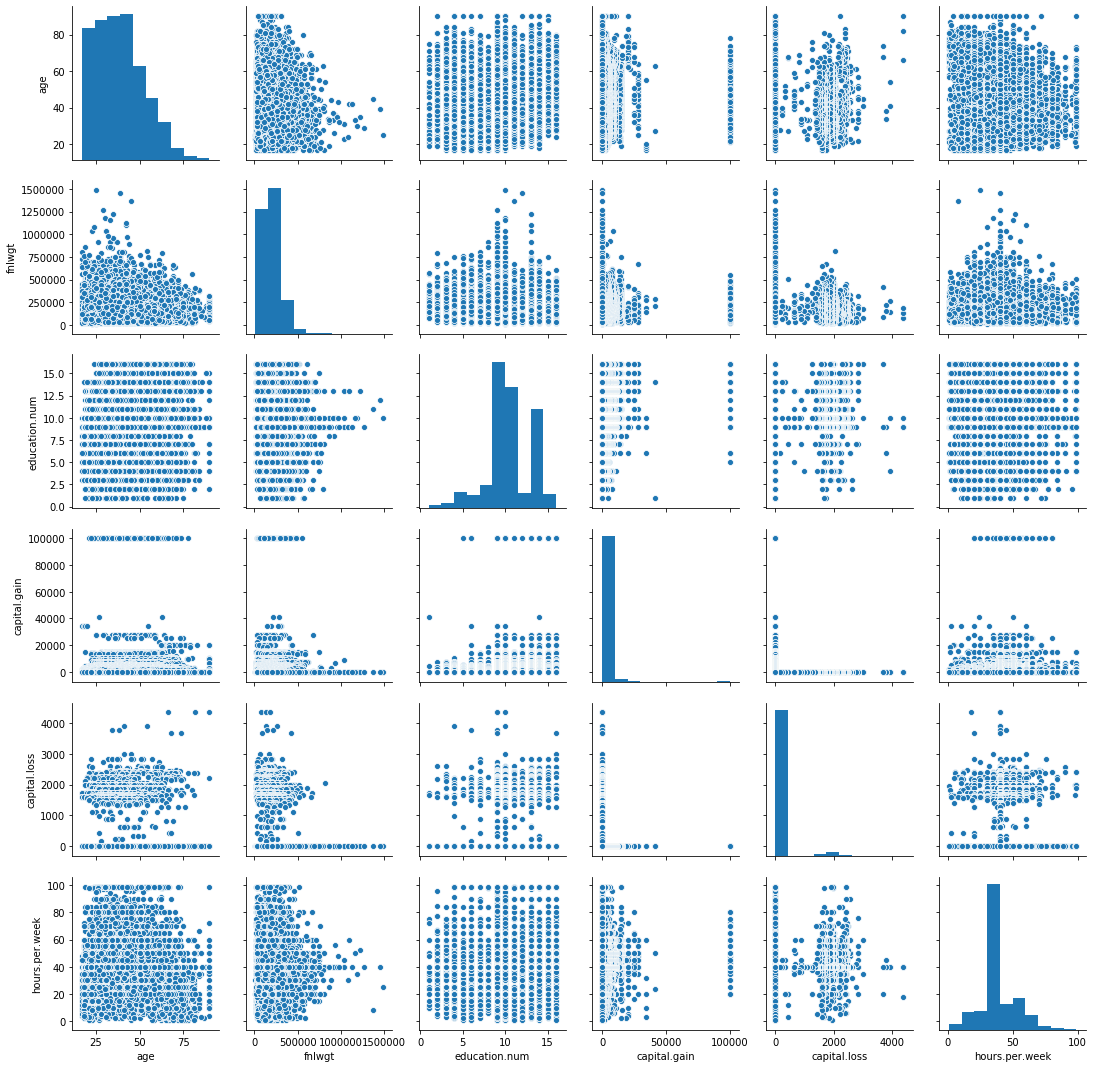

In [19]:
sns.pairplot(df) 
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['income']=lb.fit_transform(df['income'])
print(df)

       age workclass  fnlwgt  education.num         occupation   relationship  \
0       90   Unknown   77053              9            Unknown  Not-in-family   
1       82   Private  132870              9    Exec-managerial  Not-in-family   
2       66   Unknown  186061             10            Unknown      Unmarried   
3       54   Private  140359              4  Machine-op-inspct      Unmarried   
4       41   Private  264663             10     Prof-specialty      Own-child   
...    ...       ...     ...            ...                ...            ...   
32556   22   Private  310152             10    Protective-serv  Not-in-family   
32557   27   Private  257302             12       Tech-support           Wife   
32558   40   Private  154374              9  Machine-op-inspct        Husband   
32559   58   Private  151910              9       Adm-clerical      Unmarried   
32560   22   Private  201490              9       Adm-clerical      Own-child   

        race     sex  capit

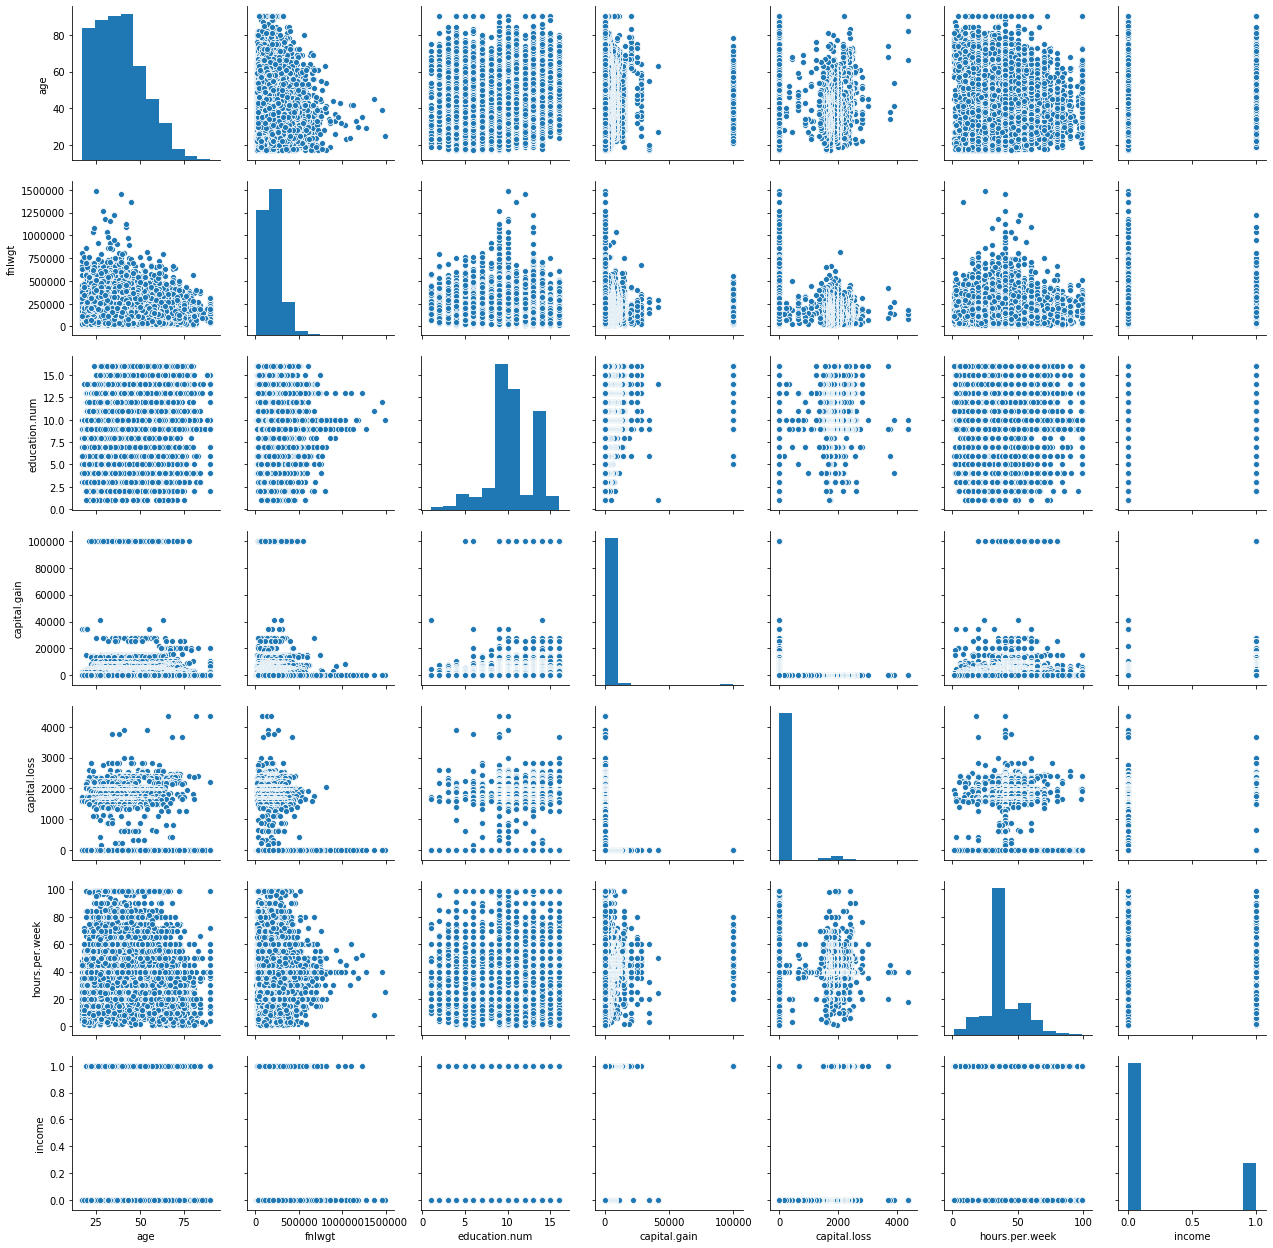

In [21]:
sns.pairplot(df) 
plt.show()

In [22]:
df.head()

,age,workclass,fnlwgt,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,Unknown,77053,9,Unknown,Not-in-family,White,Female,0,4356,40,0
1,82,Private,132870,9,Exec-managerial,Not-in-family,White,Female,0,4356,18,0
2,66,Unknown,186061,10,Unknown,Unmarried,Black,Female,0,4356,40,0
3,54,Private,140359,4,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
4,41,Private,264663,10,Prof-specialty,Own-child,White,Female,0,3900,40,0


In [23]:
df = df.drop(columns=['age', 'workclass', 'fnlwgt','education.num','occupation','relationship','race','sex','capital.gain','capital.loss',])
df

,hours.per.week,income
0,40,0
1,18,0
2,40,0
3,40,0
4,40,0
...,...,...
32556,40,0
32557,38,0
32558,40,1
32559,40,0


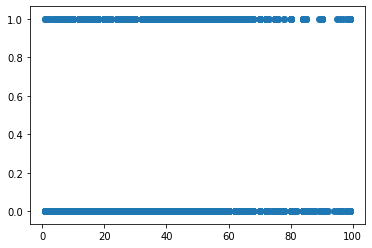

In [24]:
x= df.iloc[:,[0,1]].values
d = pd.DataFrame(x)
plt.scatter(d[0], d[1])

In [25]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components = 2)
gmm.fit(d)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

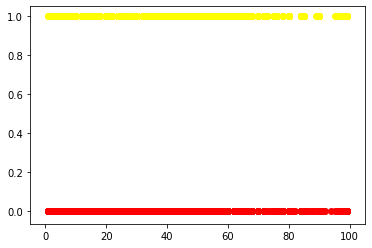

In [26]:
labels = gmm.predict(d) 
d['labels']= labels 
d0 = d[d['labels']== 0] 
d1 = d[d['labels']== 1]

plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='yellow')

 

In [27]:
print(gmm.lower_bound_)  
print(gmm.n_iter_) 

1.5337424705815015
8
